# Análise Meteorito

## Import Biblioteca e Carregamento dos Dados

In [1]:
# Carregando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carregando dados
df = pd.read_csv('meteorites.csv')
df.head()

,name,id,name_type,class,mass,fall,year,lat,long,geolocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [3]:
df.shape

(45716, 10)

## Exploração Inicial e Tratamento de Dados

In [4]:
# Verificando NaN
df.isnull().sum()

name              0
id                0
name_type         0
class             0
mass            131
fall              0
year            291
lat            7315
long           7315
geolocation    7315
dtype: int64

In [5]:
# Excluindo NaN
df.dropna(inplace = True)

In [6]:
# Verificando NaN
df.isnull().sum()

name           0
id             0
name_type      0
class          0
mass           0
fall           0
year           0
lat            0
long           0
geolocation    0
dtype: int64

In [7]:
# Veficando tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38115 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38115 non-null  object 
 1   id           38115 non-null  int64  
 2   name_type    38115 non-null  object 
 3   class        38115 non-null  object 
 4   mass         38115 non-null  float64
 5   fall         38115 non-null  object 
 6   year         38115 non-null  float64
 7   lat          38115 non-null  float64
 8   long         38115 non-null  float64
 9   geolocation  38115 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.2+ MB


In [8]:
# Convertendo coluna year para int
df['year'] = df['year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38115 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38115 non-null  object 
 1   id           38115 non-null  int64  
 2   name_type    38115 non-null  object 
 3   class        38115 non-null  object 
 4   mass         38115 non-null  float64
 5   fall         38115 non-null  object 
 6   year         38115 non-null  int64  
 7   lat          38115 non-null  float64
 8   long         38115 non-null  float64
 9   geolocation  38115 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 3.2+ MB


In [9]:
# Excluindo coluna desnecessária
df.drop(['id', 'fall', 'name_type'], axis = 1, inplace = True)
df.head()

,name,class,mass,year,lat,long,geolocation
0,Aachen,L5,21.0,1880,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,H6,720.0,1951,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,EH4,107000.0,1952,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,Acapulcoite,1914.0,1976,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,L6,780.0,1902,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [10]:
# Ordenando por ano e massa
df.sort_values(by = ['year', 'mass'], inplace = True)
df.reset_index(drop = True, inplace = True)
df.head()

,name,class,mass,year,lat,long,geolocation
0,Nogata,L6,472.0,860,33.72500,130.75000,"(33.725, 130.75)"
1,Elbogen,"Iron, IID",107000.0,1399,50.18333,12.73333,"(50.18333, 12.73333)"
2,Rivolta de Bassi,Stone-uncl,103.3,1490,45.48333,9.51667,"(45.48333, 9.51667)"
3,Ensisheim,LL6,127000.0,1491,47.86667,7.35000,"(47.86667, 7.35)"
4,Campo del Cielo,"Iron, IAB-MG",50000000.0,1575,-27.46667,-60.58333,"(-27.46667, -60.58333)"


In [11]:
# Estatística dos dados
df.describe()

,mass,year,lat,long
count,3.811500e+04,38115.000000,38115.000000,38115.000000
mean,1.560071e+04,1989.993913,-39.596529,61.309359
std,6.286817e+05,25.469892,46.175830,80.777583
min,0.000000e+00,860.000000,-87.366670,-165.433330
25%,6.630000e+00,1986.000000,-76.716670,0.000000
50%,2.909000e+01,1996.000000,-71.500000,35.666670
75%,1.872900e+02,2002.000000,0.000000,157.166670
max,6.000000e+07,2101.000000,81.166670,178.200000


In [12]:
# Removendo anos acima de 2023
df = df[df['year'] <= 2023]
df['year'].max()

2013

In [13]:
# Verificando dados unicos
df.nunique()

name           38114
class            414
mass           11248
year             252
lat            12602
long           14474
geolocation    16907
dtype: int64

In [14]:
df.columns

Index(['name', 'class', 'mass', 'year', 'lat', 'long', 'geolocation'], dtype='object')

## Visualização Dos Dados

In [15]:
# Total de queda de meteorito por ano
total_meteorito_ano = df.groupby('year').size().reset_index(name = 'quantidade')
total_meteorito_ano.head()

,year,quantidade
0,860,1
1,1399,1
2,1490,1
3,1491,1
4,1575,1


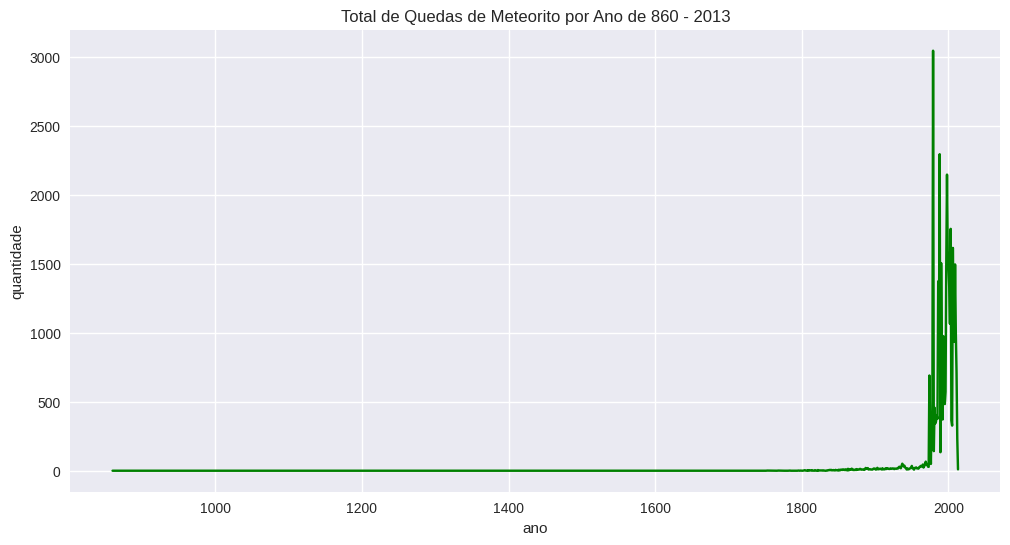

In [16]:
plt.figure(figsize = (12, 6))
plt.style.use('seaborn')
sns.lineplot(data = total_meteorito_ano, x = 'year', y = 'quantidade', color = 'green')
plt.title('Total de Quedas de Meteorito por Ano de 860 - 2013')
plt.xlabel('ano')
plt.show();

In [17]:
# Total de queda de meteorito por ano a partir de 1900
total_meteorito_ano_1900 = df[df['year'] >= 1900].groupby('year').size().reset_index(name = 'quantidade')
total_meteorito_ano_1900.head()

,year,quantidade
0,1900,16
1,1901,9
2,1902,12
3,1903,22
4,1904,11


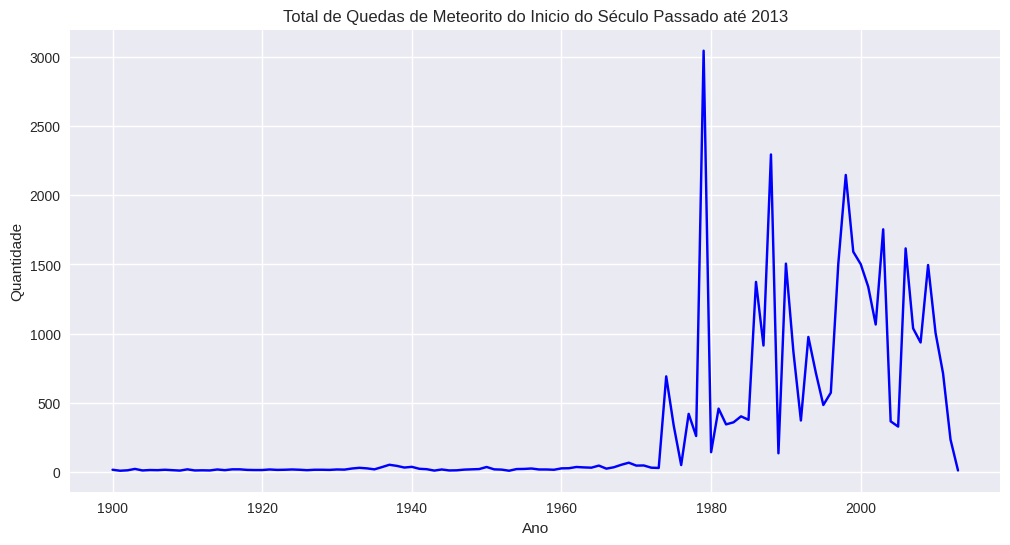

In [18]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = total_meteorito_ano_1900, x = 'year', y = 'quantidade', color = 'blue')
plt.title('Total de Quedas de Meteorito do Inicio do Século Passado até 2013')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show();

In [19]:
# Total de queda de meteorito por ano a partir de 2000
total_meteorito_ano_2000 = df[df['year'] >= 2000].groupby('year').size().reset_index(name = 'quantidade')
total_meteorito_ano_2000.head()

,year,quantidade
0,2000,1502
1,2001,1339
2,2002,1066
3,2003,1754
4,2004,366


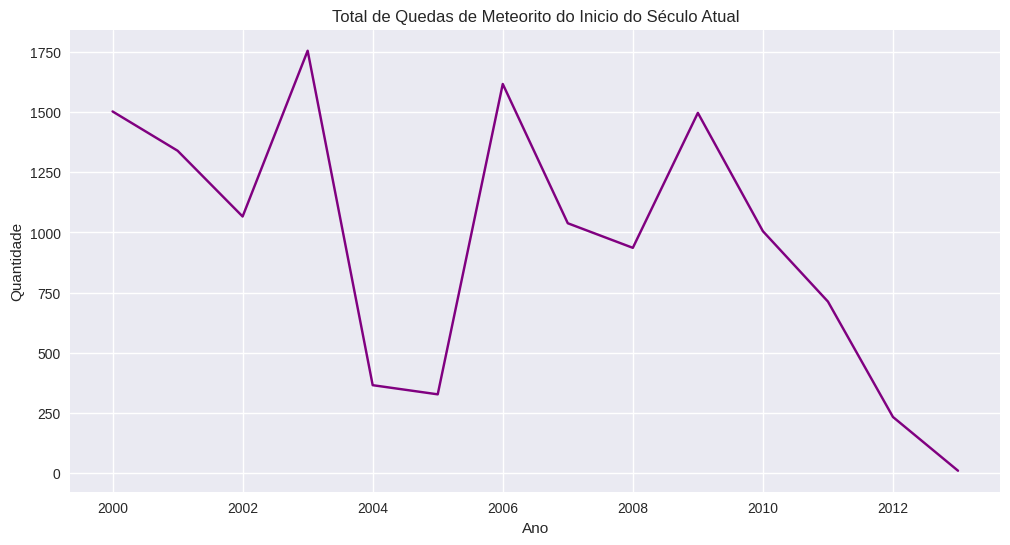

In [20]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = total_meteorito_ano_2000, x = 'year', y = 'quantidade', color = 'purple')
plt.title('Total de Quedas de Meteorito do Inicio do Século Atual')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.show();

In [21]:
df.head()

,name,class,mass,year,lat,long,geolocation
0,Nogata,L6,472.0,860,33.72500,130.75000,"(33.725, 130.75)"
1,Elbogen,"Iron, IID",107000.0,1399,50.18333,12.73333,"(50.18333, 12.73333)"
2,Rivolta de Bassi,Stone-uncl,103.3,1490,45.48333,9.51667,"(45.48333, 9.51667)"
3,Ensisheim,LL6,127000.0,1491,47.86667,7.35000,"(47.86667, 7.35)"
4,Campo del Cielo,"Iron, IAB-MG",50000000.0,1575,-27.46667,-60.58333,"(-27.46667, -60.58333)"


In [22]:
# Top 10 Classe de Meteorito
meteorito_por_classe_top10 = df.groupby('class').size().reset_index(name = 'quantidade') \
                                                .sort_values(by = 'quantidade', ascending = False).head(10)
meteorito_por_classe_top10.head()

,class,quantidade
301,L6,7573
167,H5,6264
173,H6,3899
159,H4,3891
296,L5,3285


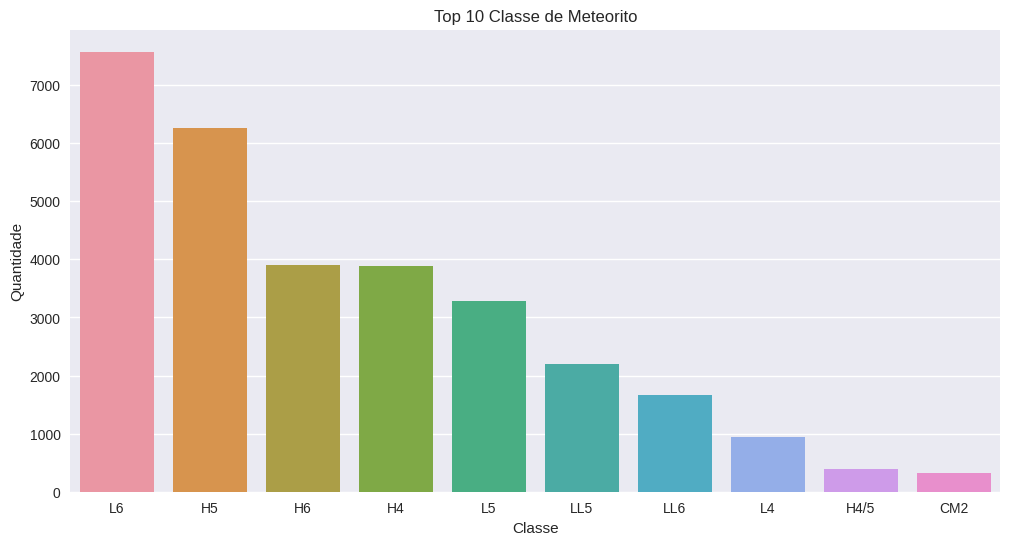

In [23]:
plt.figure(figsize = (12, 6))
sns.barplot(data = meteorito_por_classe_top10, x = 'class', y = 'quantidade')
plt.title('Top 10 Classe de Meteorito')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.show();

In [24]:
# Meteoritos com maior massa
meteorito_maior_massa = df.groupby('name')['mass'].sum().reset_index() \
                                                  .sort_values('mass', ascending = False, ignore_index = True) \
                                                  .head(10)
meteorito_maior_massa.head(10)

,name,mass
0,Hoba,60000000.0
1,Cape York,58200000.0
2,Campo del Cielo,50000000.0
3,Canyon Diablo,30000000.0
4,Armanty,28000000.0
5,Gibeon,26000000.0
6,Chupaderos,24300000.0
7,Mundrabilla,24000000.0
8,Sikhote-Alin,23000000.0
9,Bacubirito,22000000.0


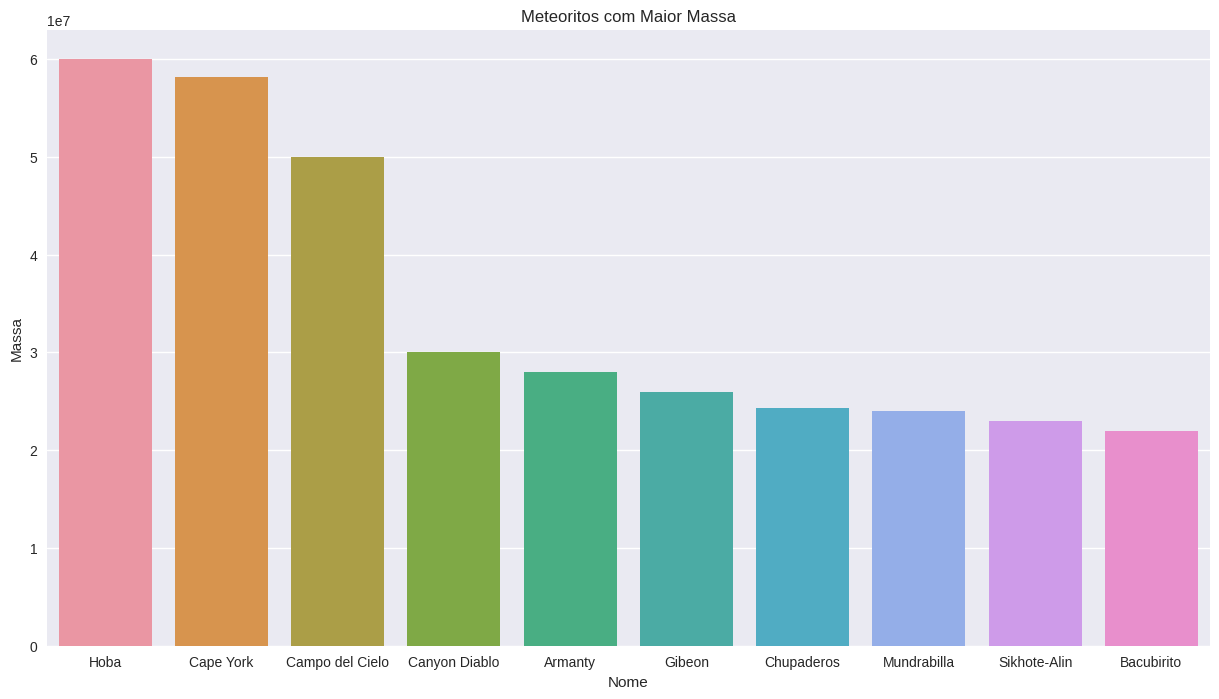

In [25]:
plt.figure(figsize = (15, 8))
sns.barplot(data = meteorito_maior_massa, x = 'name', y = 'mass')
plt.title('Meteoritos com Maior Massa')
plt.xlabel('Nome')
plt.ylabel('Massa')
plt.show();

In [26]:
# Total de massa por ano
massa_por_ano = df.groupby('year')['mass'].sum().reset_index() \
                                          .sort_values('mass', ascending = False, ignore_index = True) \
                                          .head(10)
massa_por_ano.head(10)

,year,mass
0,1920,60255072.0
1,1818,58231417.0
2,1575,50000000.0
3,1891,30655725.0
4,1898,28147293.5
5,1836,26148300.0
6,1863,24688510.0
7,1852,24390590.0
8,1911,24070156.9
9,1947,23959461.0


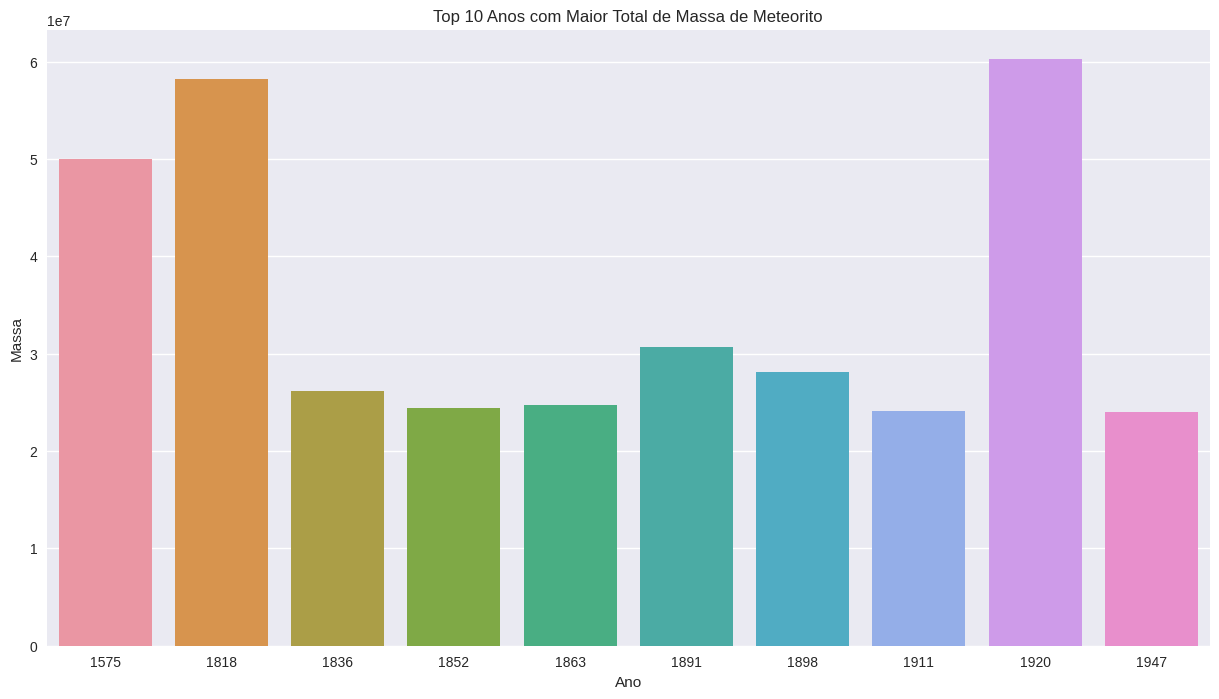

In [27]:
plt.figure(figsize = (15, 8))
sns.barplot(data = massa_por_ano, x = 'year', y = 'mass')
plt.title('Top 10 Anos com Maior Total de Massa de Meteorito')
plt.xlabel('Ano')
plt.ylabel('Massa')
plt.show();